In [32]:
from PIL import Image, ImageDraw
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
source_path = '/content/drive/MyDrive/Colab Notebooks/augment/*'

In [35]:
images_paths = glob.glob(source_path)

In [36]:
class_name = ['Gingivits', 'Cold_Sores', 'Canker_Sores', 'Periodontitis', 'Receding_Gum', 'abfraction', 'Thrush', 'Gingival_Cyst']

In [37]:
images_paths

['/content/drive/MyDrive/Colab Notebooks/augment/Gingivits',
 '/content/drive/MyDrive/Colab Notebooks/augment/Canker Sores',
 '/content/drive/MyDrive/Colab Notebooks/augment/Cold Sores',
 '/content/drive/MyDrive/Colab Notebooks/augment/Receding Gum',
 '/content/drive/MyDrive/Colab Notebooks/augment/abfraction',
 '/content/drive/MyDrive/Colab Notebooks/augment/Periodontitis',
 '/content/drive/MyDrive/Colab Notebooks/augment/Thrush',
 '/content/drive/MyDrive/Colab Notebooks/augment/Gingival Cyst']

In [38]:
eight_class = []
class_volume = []

In [39]:
for i in images_paths:
    images = glob.glob( i +'/*.jpeg')
    class_volume.append(len(images))
    eight_class.append(images)

In [40]:
len(eight_class)

8

In [41]:
images = []
labels = []

In [42]:
class_volume

[351, 220, 264, 352, 329, 440, 220, 274]

In [43]:
import matplotlib.ticker as ticker

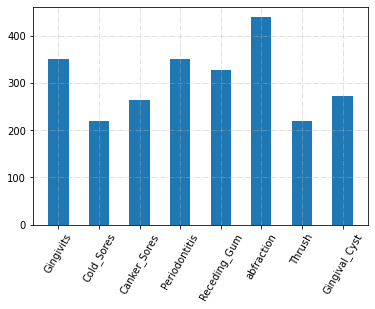

In [44]:
plt.figure()
x = np.arange(8)
y = class_volume
plt.bar(x, y, width=0.5, tick_label=class_name)
plt.grid(linestyle='-.',alpha=0.5)
plt.xticks(x, class_name, rotation = 60)
plt.show()

In [45]:
for classIndex in range(len(eight_class)):
    for imagefile in eight_class[classIndex]:
        image = Image.open(imagefile).resize((90,90))
        image = image = np.asarray(image)/255.0
        images.append(image)
        labels.append(classIndex)

In [46]:
images = np.array(images)
labels = np.array(labels)

In [47]:
encoder = LabelBinarizer()
labels_onehot = encoder.fit_transform( labels )

In [48]:
images.shape,  labels_onehot.shape

((2450, 90, 90, 3), (2450, 8))

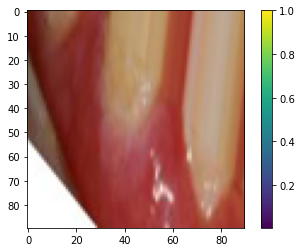

In [49]:
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
x_train, x_test, y_train, y_test = train_test_split( images, labels, test_size=0.1 )

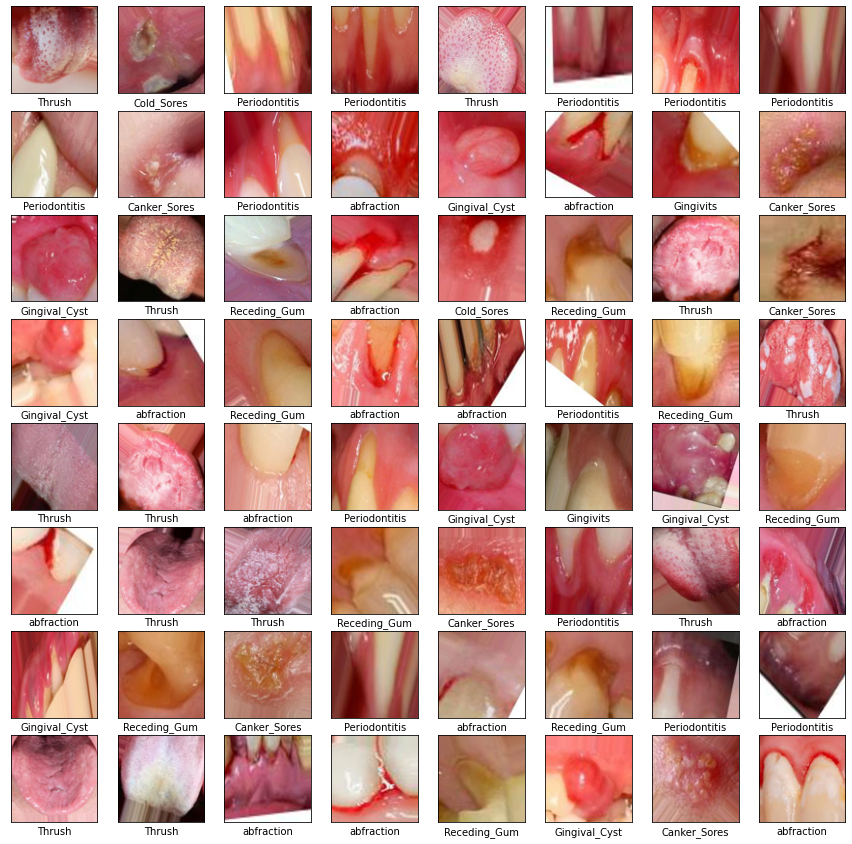

In [51]:
plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(x_train)[i])
    plt.xlabel(np.array(class_name)[np.array(y_train)[i]])
plt.show()

In [52]:
x_train, x_test, y_train, y_test = train_test_split( images, labels, test_size=0.1 )

In [53]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2205, 90, 90, 3) (245, 90, 90, 3) (2205,) (245,)


In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Activation('softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
56/56 [==============================] - 24s 415ms/step - loss: 1.7600 - accuracy: 0.4048 - val_loss: 1.6524 - val_accuracy: 0.4082
Epoch 2/20
56/56 [==============================] - 23s 409ms/step - loss: 0.9401 - accuracy: 0.6701 - val_loss: 1.3583 - val_accuracy: 0.5964
Epoch 3/20
56/56 [==============================] - 23s 411ms/step - loss: 0.6737 - accuracy: 0.7647 - val_loss: 1.1158 - val_accuracy: 0.6576
Epoch 4/20
56/56 [==============================] - 24s 423ms/step - loss: 0.4421 - accuracy: 0.8492 - val_loss: 0.8053 - val_accuracy: 0.7211
Epoch 5/20
56/56 [==============================] - 23s 409ms/step - loss: 0.2923 - accuracy: 0.8997 - val_loss: 0.7840 - val_accuracy: 0.7234
Epoch 6/20
56/56 [==============================] - 23s 410ms/step - loss: 0.2485 - accuracy: 0.9150 - val_loss: 0.6687 - val_accuracy: 0.7619
Epoch 7/20
56/56 [==============================] - 23s 418ms/step - loss: 0.1259 - accuracy: 0.9632 - val_loss: 0.6814 - val_accuracy: 0.7710

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Batc  (None, 90, 90, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                      

In [58]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

8/8 - 1s - loss: 0.9427 - accuracy: 0.7959 - 740ms/epoch - 93ms/step

Test accuracy: 0.795918345451355


## Data Augmentation

In [59]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(90, 90, 3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [66]:
model = tf.keras.models.Sequential([
    data_augmentation,                                
    tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Activation('softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
56/56 [==============================] - 26s 453ms/step - loss: 1.6259 - accuracy: 0.4093 - val_loss: 1.8367 - val_accuracy: 0.2154
Epoch 2/20
56/56 [==============================] - 25s 448ms/step - loss: 1.0330 - accuracy: 0.6105 - val_loss: 1.7368 - val_accuracy: 0.3356
Epoch 3/20
56/56 [==============================] - 25s 447ms/step - loss: 0.8329 - accuracy: 0.7029 - val_loss: 1.1744 - val_accuracy: 0.5533
Epoch 4/20
56/56 [==============================] - 25s 449ms/step - loss: 0.7082 - accuracy: 0.7534 - val_loss: 0.7768 - val_accuracy: 0.7438
Epoch 5/20
56/56 [==============================] - 25s 448ms/step - loss: 0.6035 - accuracy: 0.7823 - val_loss: 0.7226 - val_accuracy: 0.7302
Epoch 6/20
56/56 [==============================] - 25s 446ms/step - loss: 0.5271 - accuracy: 0.8163 - val_loss: 0.5362 - val_accuracy: 0.7914
Epoch 7/20
56/56 [==============================] - 25s 446ms/step - loss: 0.4285 - accuracy: 0.8543 - val_loss: 0.5280 - val_accuracy: 0.8118

In [67]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 90, 90, 3)         0         
                                                                 
 batch_normalization_8 (Batc  (None, 90, 90, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 22, 22, 64)      

In [68]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

8/8 - 1s - loss: 0.2288 - accuracy: 0.9224 - 722ms/epoch - 90ms/step

Test accuracy: 0.922448992729187


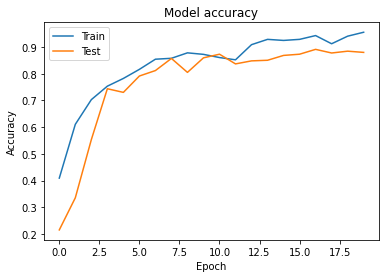

In [71]:
# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

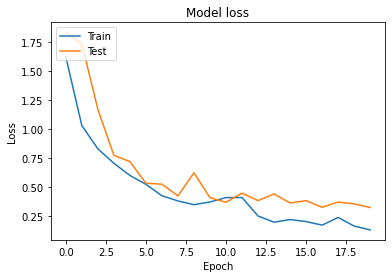

In [72]:
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()